In [2]:
import cv2

img = cv2.imread(r"D:\Courses\AI work\NTI\Day3\pic.webp",0)
bilateral = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

cv2.imshow("Original", img)
cv2.imshow("Bilateral", bilateral)
cv2.waitKey(0)


-1

(np.float64(-0.5), np.float64(473.5), np.float64(314.5), np.float64(-0.5))

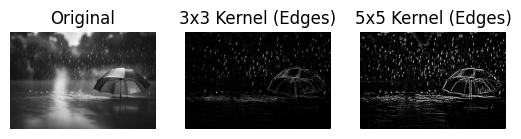

In [4]:
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

img = cv2.imread(r"D:\Courses\AI work\NTI\Day3\pic.webp", cv2.IMREAD_GRAYSCALE)

kernel_3x3 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
    ])


kernel_5x5 = np.array([
    [-1,-1,-1,-1,-1],
    [-1, 1, 2, 1,-1],
    [-1, 2, 4, 2,-1],
    [-1, 1, 2, 1,-1],
    [-1,-1,-1,-1,-1]
    ])

out_put_3x3 = cv2.filter2D(img, -1, kernel_3x3)
out_put_5x5 = cv2.filter2D(img, -1, kernel_5x5)
plt.figure()
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("3x3 Kernel (Edges)")
plt.imshow(out_put_3x3, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("5x5 Kernel (Edges)")
plt.imshow(out_put_5x5, cmap="gray")
plt.axis("off")



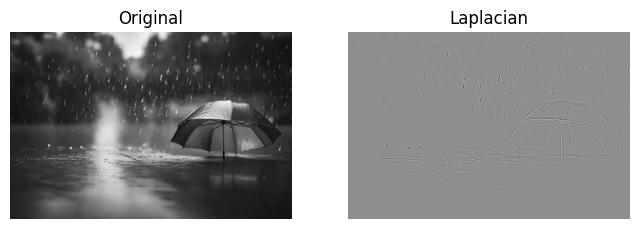

In [14]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(r"D:\Courses\AI work\NTI\Day3\pic.webp", cv2.IMREAD_GRAYSCALE)

laplacian = cv2.Laplacian(img, cv2.CV_32F)

plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Laplacian")
plt.imshow(laplacian, cmap="gray")
plt.axis("off")
plt.show()

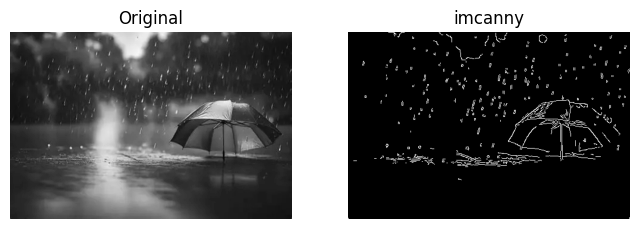

In [20]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(r"D:\Courses\AI work\NTI\Day3\pic.webp", cv2.IMREAD_GRAYSCALE)
imcanny= cv2.Canny(img, 150,200)
cv2.imwrite("canny.jpg", imcanny)

plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("imcanny")
plt.imshow(imcanny, cmap="gray")
plt.axis("off")

plt.show()

In [5]:
import cv2
import numpy as np

img = cv2.imread(r"D:\Courses\AI work\NTI\Day3\OIP.XW8x87egCwA2Gy1L18IDdAHaFD.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("original", gray)

gray=np.float32(gray)
dst = cv2.cornerHarris(gray, 2,3, 0.05)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0, 0, 255]
num_corners = np.sum(dst > 0.01 * dst.max())
print("Number of corners detected:", num_corners)

cv2.imshow('dst', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of corners detected: 2471


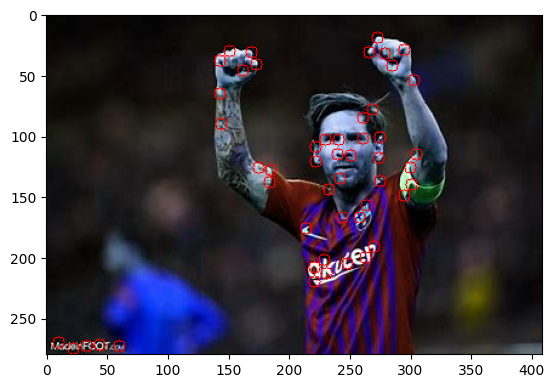

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(r"D:\Courses\AI work\NTI\Day3\OIP.XW8x87egCwA2Gy1L18IDdAHaFD.jpeg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray_img, 50, 0.01, 10)
corner = np.int32(corners)

for i in corners:
    x, y = i.ravel ()
    cv2.circle(img, (int(x), int(y)), 5,255, 0)

plt.imshow(img)
plt.show()

Number of edges (contours): 153


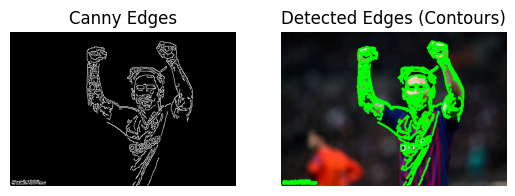

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(r"D:\Courses\AI work\NTI\Day3\OIP.XW8x87egCwA2Gy1L18IDdAHaFD.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 1: Edge detection (Canny)
edges = cv2.Canny(gray, 100, 200)

# Step 2: Find contours (continuous edges)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("Number of edges (contours):", len(contours))

# Draw edges
edge_img = img.copy()
cv2.drawContours(edge_img, contours, -1, (0,255,0), 2)

plt.subplot(1,2,1)
plt.title("Canny Edges")
plt.imshow(edges, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Detected Edges (Contours)")
plt.imshow(edge_img[:,:,::-1])  # BGR → RGB
plt.axis("off")

plt.show()


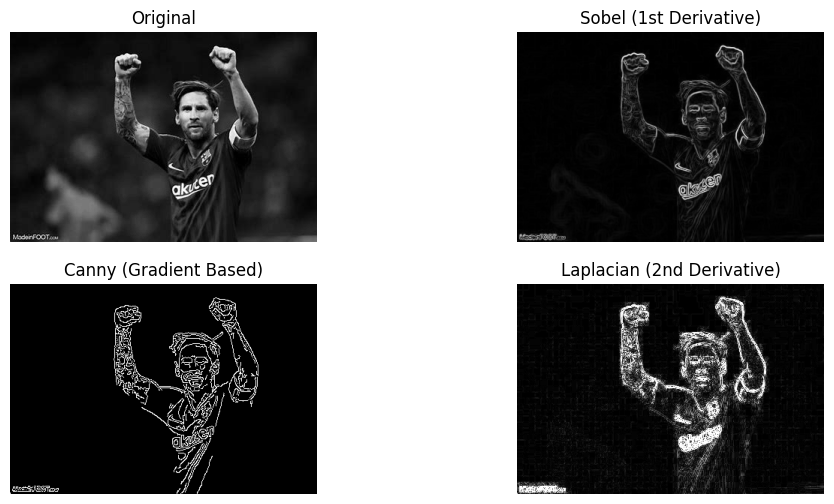

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load grayscale image
img = cv2.imread(r"D:\Courses\AI work\NTI\Day3\OIP.XW8x87egCwA2Gy1L18IDdAHaFD.jpeg", cv2.IMREAD_GRAYSCALE)

# --- 1. First Derivative (Gradient-based) ---
# Using Sobel operator (1st derivative in x and y)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobelx, sobely)

# Alternatively, Canny also works with gradients internally
canny_edges = cv2.Canny(img, 100, 200)

# --- 2. Second Derivative (Laplacian) ---
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
laplacian_edges = cv2.convertScaleAbs(laplacian)

# --- Plot results ---
plt.figure(figsize=(12,6))

plt.subplot(2,2,1), plt.imshow(img, cmap='gray')
plt.title("Original"), plt.axis("off")

plt.subplot(2,2,2), plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel (1st Derivative)"), plt.axis("off")

plt.subplot(2,2,3), plt.imshow(canny_edges, cmap='gray')
plt.title("Canny (Gradient Based)"), plt.axis("off")

plt.subplot(2,2,4), plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian (2nd Derivative)"), plt.axis("off")

plt.show()
